# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
import warnings
from scipy.io.wavfile import write

Complex Exponential Class


In [ ]:
class cexp(object):
  """
  Creates a discrete complex exponential of discrete frequency k and Duration N.
  Arguments:
  k: discrete frequency
  N: duration of the complex exponential
  """
  def __init__(self, k, N):
    self.k = k
    self.N = N
    # Create time indices [0,..,N-1]
    self.n = np.arange(N)
    # Vector containing elements of the complex exponential
    self.exp_kN = (1/(np.sqrt(N))) * np.exp(2j*cmath.pi*self.k*self.n/self.N)
    # Real and imaginary parts
    self.exp_kN_real = self.exp_kN.real
    self.exp_kN_imag = self.exp_kN.imag

# Problem **1.1**

In [ ]:
def cexpt(f, T, fs):
  # Duration of the discrete signal
  N = math.floor(T * fs)
  t = np.linspace(0, (N - 1) / fs, N)
  # Discrete frequency
  k = N * f / fs
  # Complex exponential
  cpx_exp = cexp(k, N)
  x = cpx_exp.exp_kN
  x = np.sqrt(N) * x
  
  return t, x, N

In [ ]:
class dft(object):
  def __init__(self, x, fs, K = None):
    self.x = x
    self.fs = fs
    self.N = len(x)
    if K == None:
      K = len(self.x)
    self.K = K
    self.f = np.arange(self.K)*self.fs/self.N
    self.f_c = np.arange(-np.ceil(K/2)+1,np.floor(self.K/2)+1)*self.fs/self.K

  def solve(self):
    X = np.fft.fft(self.x, self.K)/np.sqrt(self.N);
    X_c = np.roll(X, np.int(np.ceil(self.K/2-1)))
    
    return [self.f, X, self.f_c,X_c]

In [ ]:
def energy(f, X,  interval):
  aux = 0
  for i, freq in enumerate(f):
    if freq >= interval[0] and freq <= interval[1]:
      aux = aux + abs(X[i]*np.conjugate(X[i]))
  return aux

# Problem **1.2**

In [ ]:
class square(object):
  def __init__(self, T0, T, fs):
    self.N = np.int(np.floor(T*fs))
    self.M = np.int(np.floor(T0*fs))
    self.pulse = 1/np.sqrt(self.M) * np.concatenate((np.ones(self.M), np.zeros(self.N - self.M)))
    self.t = np.arange(0, T, 1/fs)

In [1]:
def q_12(T, fs, T0s):
  for T0 in T0s:
    sqpulse_signal = square(T0, T, fs)
    sqpulse_dft = dft(sqpulse_signal.pulse, fs)
    [freqs, X, f_c, X_c] = sqpulse_dft.solve()

    Total_ener = np.sum(abs(X_c)**2)
    Partial_ener = abs(energy(f_c, X_c, [-1 / T0, 1 / T0]))
    print('Energy fraction of a square pulse of T0=%.2f is %.4f'%(T0, Partial_ener/Total_ener))

    # Plot
    fig, axs = plt.subplots(2)
    axs[0].grid()
    axs[1].grid()
    fig.suptitle('Square Pulse of Width %.2fs '%(T0))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
    axs[0].plot(sqpulse_signal.t, sqpulse_signal.pulse)
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Signal')
    axs[1].plot(f_c, abs(X_c))
    axs[1].set_xlabel('Frequency (Hz)')
    axs[1].set_ylabel('DFT')
    # plt.savefig('square_pulse_' + str(T0) + '.png')
    plt.show()

In [2]:
if __name__ == '__main__':
  T0s = [0.5, 1, 4, 16]
  duration_of_signal = 32
  sampling_frequency = 8
  q_12(duration_of_signal, sampling_frequency, T0s)

NameError: ignored

# Problem **1.3**

In [ ]:
class triangle(object):
  def __init__(self, T0, T, fs):
    self.N = np.int(np.floor(T*fs))
    self.M = np.int(np.floor(T0*fs))
    ascendent_part = np.arange(0,np.ceil(T0/2*fs))
    descendent_part = np.arange(np.ceil(T0/2*fs)-1,0,-1)
    self.pulse = np.concatenate((ascendent_part, descendent_part, np.zeros(self.N-len(ascendent_part)-len(descendent_part))))
    self.pulse *= 1/np.linalg.norm(self.pulse)
    self.t = np.arange(0, T, 1/fs)

In [ ]:
def q_13(T, fs, T0s):
  for T0 in T0s:
    tripulse_signal = triangle(T0, T, fs)
    tripulse_dft = dft(tripulse_signal.pulse, fs)
    [freqs, X, f_c, X_c] = tripulse_dft.solve()

    Total_ener = np.sum(abs(X_c)**2)
    Partial_ener = abs(energy(f_c, X_c, [-1 / T0, 1 / T0]))
    print('Energy fraction of a triangle pulse of T0=%.2f is %.4f'%(T0, Partial_ener/Total_ener))

    # Plot
    fig, axs = plt.subplots(2)
    axs[0].grid()
    axs[1].grid()
    fig.suptitle('Triangle Pulse of Width %.2fs '%(T0))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
    axs[0].plot(tripulse_signal.t, tripulse_signal.pulse)
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Signal')
    axs[1].plot(f_c, abs(X_c))
    axs[1].set_xlabel('Frequency (Hz)')
    axs[1].set_ylabel('DFT')
    # plt.savefig('square_pulse_' + str(T0) + '.png')
    plt.show()

Energy fraction of a triangle pulse of T0=0.50 is 0.8222


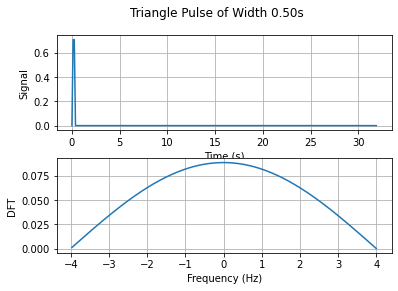

Energy fraction of a triangle pulse of T0=1.00 is 0.9124


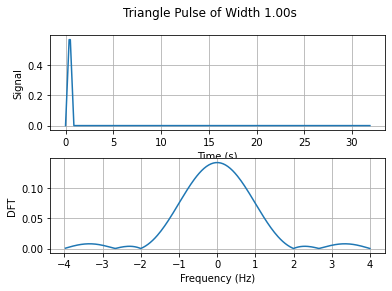

Energy fraction of a triangle pulse of T0=4.00 is 0.9571


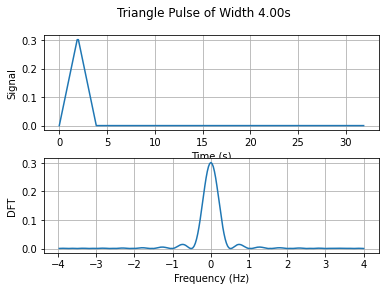

Energy fraction of a triangle pulse of T0=16.00 is 0.9904


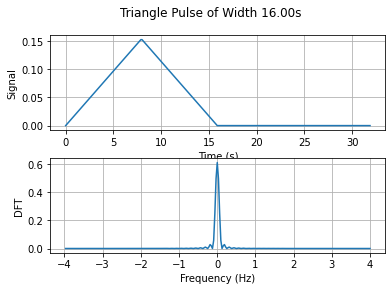

In [ ]:
if __name__ == '__main__':
  T0s = [0.5, 1, 4, 16]
  duration_of_signal = 32
  sampling_frequency = 8
  q_13(duration_of_signal, sampling_frequency, T0s)

# Problem **1.4**

In [ ]:
class window(object):
  def __init__(self, val, T, fs):
    self.N = np.int(np.floor(T*fs))
    self.signal = np.kaiser(self.N, val)
    self.signal *= 1 / np.linalg.norm(self.signal)
    self.t = np.arange(0, T, 1/fs)

In [ ]:
def q_14(T, fs, vals):
  for val in vals:
    kaiser_signal = window(val, T, fs)
    kaiser_dft = dft(kaiser_signal.signal, fs)
    [freqs, X, f_c, X_c] = kaiser_dft.solve()

    Total_ener = np.sum(abs(X_c)**2)
    Partial_ener = abs(energy(f_c, X_c, [-1 / val, 1 / val]))
    print('Energy fraction of a kaiser window of T0=%.2f is %.4f'%(val, Partial_ener/Total_ener))

    # Plot
    fig, axs = plt.subplots(2)
    axs[0].grid()
    axs[1].grid()
    fig.suptitle('Kaiser Window of Beta %.2f '%(val))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
    axs[0].plot(kaiser_signal.t, kaiser_signal.signal)
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Signal')
    axs[1].plot(f_c, abs(X_c))
    axs[1].set_xlabel('Frequency (Hz)')
    axs[1].set_ylabel('DFT')
    # plt.savefig('square_pulse_' + str(T0) + '.png')
    plt.show()

Energy fraction of a kaiser window of T0=8.00 is 1.0000


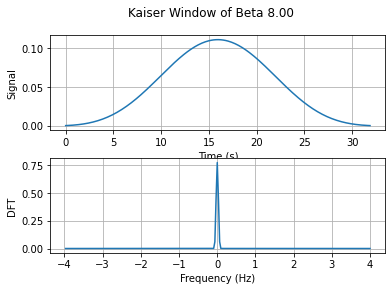

Energy fraction of a kaiser window of T0=16.00 is 0.9970


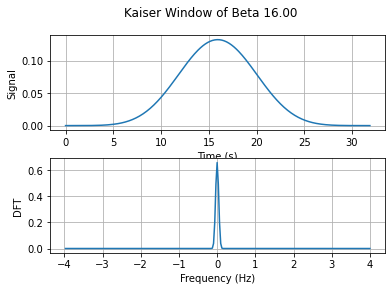

In [ ]:
if __name__ == '__main__':
  params = [8, 16]
  duration_of_signal = 32
  sampling_frequency = 8
  q_14(duration_of_signal, sampling_frequency, params)

# Problem 3.1

In [ ]:
def q_31(f_0, T, f_s): 
    t, cpxexp, num_samples = cexpt(f_0, T, f_s)
    cos = np.real(cpxexp)
    sin = np.imag(cpxexp)
    Anote_dft = dft(cos, f_s)
    [freqs, X, f_c, X_c] = Anote_dft.solve()
    print('The norm of the signal of an A note is',np.linalg.norm(abs(np.real(cpxexp)))**2)
    print('The norm of the real component DFT of an A note is',np.linalg.norm(abs(X_c))**2)

    Anote_dft = dft(sin, f_s)
    [freqs1, X1, f_c1, X_c1] = Anote_dft.solve()
    print('The norm of the signal of an A note is',np.linalg.norm(abs(np.real(cpxexp)))**2)
    print('The norm of the imaginary component DFT of an A note is',np.linalg.norm(abs(X_c))**2)


    fig, axs = plt.subplots(2)
    axs[0].grid()
    axs[1].grid()
    fig.suptitle('Real and Imaginary Parts of DFT of an A Note' )
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
    axs[0].plot(f_c, abs(X_c))
    axs[0].set_xlabel('Frequency (Hz)')
    axs[0].set_ylabel('DFT (real)')
    axs[1].plot(f_c1, abs(X_c1))
    axs[1].set_xlabel('Frequency (Hz)')
    axs[1].set_ylabel('DFT (imag)')
    plt.show()

The norm of the signal of an A note is 44100.000000000015
The norm of the real component DFT of an A note is 44100.00000000002
The norm of the signal of an A note is 44100.000000000015
The norm of the imaginary component DFT of an A note is 44100.00000000002


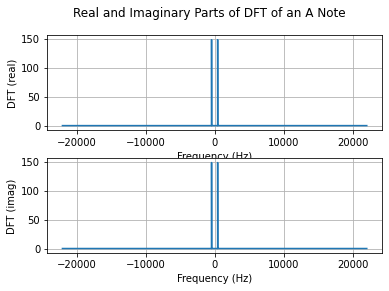

In [ ]:
if __name__ == '__main__':
  f_0 = 440
  T = 2 
  f_s = 44100 
  q_31(f_0, T, f_s)

# Problem 3.2



In [ ]:
def q_32(list_notes, list_times, f_s):
    assert len(list_notes) == len(list_times), "List of musical notes and musical times should have same length"
    song = []
    for note, note_time in zip(list_notes, list_times):
        fi = 2**((note - 49) / 12)*440
        _, x, N = cexpt(fi, note_time, f_s)
        song = np.append(song, x.real)
        song = np.append(song, np.zeros(10))

    Anote_dft = dft(song, f_s)
    [freqs, X, f_c, X_c] = Anote_dft.solve()

    plt.figure()
    plt.plot(f_c, abs(X_c))
    plt.xlim((-2000,2000))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('DFT')
    plt.title('DFT of Heart and Soul')
    # plt.savefig('song_dft.png')
    plt.show()
    return song,f_c, X_c

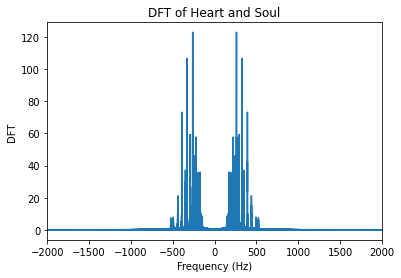

In [ ]:
if __name__ == '__main__':
#notes 
  D3 = 30 
  E3 = 32 
  F3 = 33 
  G3 = 35 
  A3 = 37 
  B3 = 39 
  C4 = 40 
  D4 = 42 
  E4 = 44
  F4 = 45 
  G4 = 47 
  A4 = 49
  B4 = 51
  C5 = 52 

  #Song (Heart and Soul) 
  song_only_notes = [C4, C4, E4, E4, A3, A3, C4, C4, F3, F3, A3, A3, G3, G3, B3, 
                    B3, C4, C4, E4, E4, A3, A3, C4, C4, F3, F3, A3, A3, G3, G3, 
                    B3, B3, C4, C4, C4, C4, B3, A3, B3, C4, D4, E4, E4, E4, E4, 
                    D4, C4, D4, E4, F4, G4, C4, A4, G4, F4, E4, D4, C4, B3, A3, 
                    G3, F3, E3, D3, E3, F3, G3, A3, B3, C4, C4, E4, E4, A3, A3, 
                    C4, C4, F3, F3, A3, A3, G3, G3, B3, B3, C4, C4, C4, C4, B3, 
                    A3, B3, C4, D4, E4, E4, E4, E4, D4, C4, D4, E4, F4, G4, C4, 
                    A4, G4, F4, E4, D4, C4, C5, B4, A4, B4, A4, G4, F4, G4, F4, 
                    E4, D4, G4, C4] 
  #half note base
  rhythm = 1
  #eighth note
  e = rhythm * 0.5 
  #quarter note
  q = rhythm * 1.0 
  #quarter note + double triplet 
  qdt = rhythm * (1 + (2/3))
  #half note 
  h = rhythm * 2.0 
  #half note + double triplet 
  hdt = rhythm * (2 + (2/3)) 
  #triplet
  t = rhythm * (1/3) 
  #double triplet
  dt = rhythm * (2/3) 

  song_rhythm = [dt, t, dt, t, dt, t, dt, t, dt, t, dt, t, dt, t, dt, t, 
                dt, t, dt, t, dt, t, dt, t, dt, t, dt, t, dt, t, dt, t, 
                q, q, hdt, t, dt, t, dt, t, q, q, q, hdt, t, dt, t, dt, t, q, h, 
                hdt, t, dt, t, q, q, qdt, t, qdt, t, dt, t, dt, t, dt, t, dt, t,
                dt, t, dt, t, dt, t, dt, t, dt, t, dt, t, dt, t, dt, t, q, q, hdt, 
                t, dt, t, dt, t, q, q, q, 
                hdt, t, dt, t, dt, t, q, h, hdt, t, dt, t, q, q, q, dt, t, dt, 
                t, dt, t, dt, t, dt, t, q, q, h]  

  song,f_c, X_c=q_32(song_only_notes, song_rhythm, f_s)

# Problem 3.3

In [ ]:
def q_33(song, f_c, X_c,notes_freq, notes_repetitions, notes):
    """
    song: List that contains the song
    f_c: List of frequencies of the DFT of the song (centered in 0)
    X_c: List of values of the DFT of the song (centered in 0)
    notes_freq: List of frequencies of the notes used for the song
    notes_repetitions: List of repetitions of each note i song
    notes: List of notes 
    """
    fig, axs = plt.subplots(2)
    axs[0].grid()
    axs[1].grid()
    fig.suptitle('Energy per note of Heart and Soul')
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, 
                        wspace=None, hspace=0.3)

    ener_X_c=[abs(X_c[i])**2 for i in range(len(X_c))]

    axs[0].plot(f_c, ener_X_c)
    axs[0].set_ylabel('DFT')
    axs[0].set_xlim((0,2000))
    axs[0].set_xlabel('Frequency (Hz)')
    y_max=max(ener_X_c)*1.1
    axs[0].set_ylim((0, y_max))
    axs[1].bar(notes_freq,notes_repetitions, width=15)
    axs[1].set_xlim((0,2000))
    y_max = max(notes_repetitions) * 1.1
    axs[1].set_ylim((0, y_max))
    axs[1].set_ylabel('Number of time')
    axs[1].set_xlabel('Frequency (Hz)')
    plt.show()

# Problem 3.4


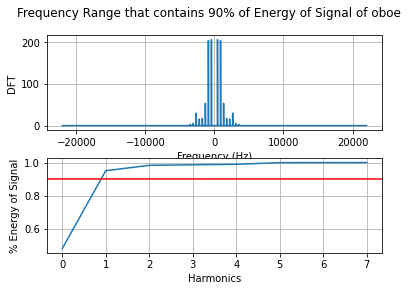

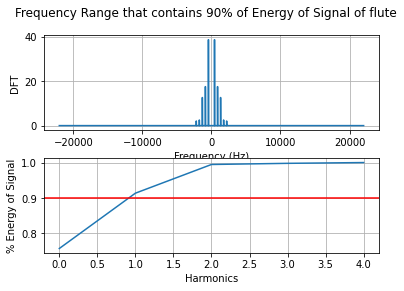

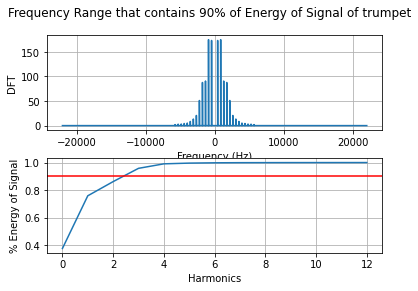

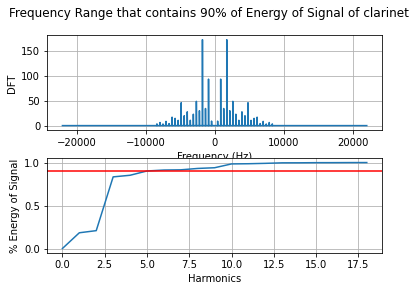

In [ ]:
def q_34(f_0, T, f_s, instruments, name_of_instruments): 
  for i,harmonic in enumerate(instruments):
    note=np.zeros(T*f_s)
    for j,h in enumerate(harmonic):
        t, cpxexp, num_samples = cexpt(f_0*(j+1), T, f_s)
        note=note+h*np.real(cpxexp)


    Anote_dft = dft(note, f_s)
    [freqs, X, f_c, X_c] = Anote_dft.solve()

    total_energy=sum(abs(X_c)**2)
    energy_per_harmonic=[]
    for j,h in enumerate(harmonic):
        energy_per_harmonic = energy_per_harmonic+[energy(f_c, X_c, 
                                                        [-f_0*(j+1),f_0*(j+1)]) 
                                                        / total_energy]

    fig, axs = plt.subplots(2)
    axs[0].grid()
    axs[1].grid()
    fig.suptitle('Frequency Range that contains 90% of Energy of Signal of ' + name_of_instruments[i])
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
    axs[0].plot(f_c, abs(X_c))
    axs[0].set_xlabel('Frequency (Hz)')
    axs[0].set_ylabel('DFT')

    axs[1].plot(energy_per_harmonic)
    axs[1].axhline(y=0.9, color='r', linestyle='-')
    axs[1].set_xlabel('Harmonics')
    axs[1].set_ylabel('% Energy of Signal')
    plt.show()

if __name__ == '__main__':
  f_0 = 440
  T = 2 
  f_s = 44100 
    
  oboe = [1.386, 1.370, 0.360, 0.116, 0.106, 0.201, 0.037, 0.019] 
  flute = [0.260, 0.118, 0.085, 0.017, 0.014]
  trumpet = [1.167, 1.178, 0.611, 0.591, 0.344, 0.139, 0.090, 0.057, 0.035, 
              0.029, 0.022, 0.020, 0.014] 
  clarinet = [0.061, 0.628, 0.231, 1.161, 0.201, 0.328, 0.154, 0.072, 0.186, 
              0.133, 0.309, 0.071, 0.098, 0.114, 0.027, 0.057, 0.022, 0.042, 
              0.023]

  f_0 = 440
  T = 2 
  f_s = 44100 

  q_34(f_0,T,f_s,[oboe,flute,trumpet,clarinet],
       ['oboe','flute','trumpet','clarinet'])

# Problem 3.5

In [ ]:
def q_35(list_notes,list_times, fs, instrument, names_of_instruments):

    song = []
    for note, note_time in zip(list_notes, list_times):
        fi = 2**((note - 49) / 12)*440
        note = np.zeros(math.floor(note_time * fs))
        for i,h in enumerate(instrument):
            t, x, N = cexpt(fi*(i+1), note_time, fs)
            note=note+h*x

        song = np.append(song, x.real)

    write('song_in'+names_of_instruments+'.wav', fs, song.astype(np.float32))
    song_dft = dft(song, fs)
    [freqs, X, f_c, X_c] = song_dft.solve()

    plt.figure()
    plt.grid(True)
    plt.title('Heart and Soul played in the '+names_of_instruments)
    plt.plot(f_c, abs(X_c))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('DFT')
    plt.show()

# Main


The norm of the signal of an A note is 44100.000000000015
The norm of the real component DFT of an A note is 44100.00000000002
The norm of the signal of an A note is 44100.000000000015
The norm of the imaginary component DFT of an A note is 44100.00000000002


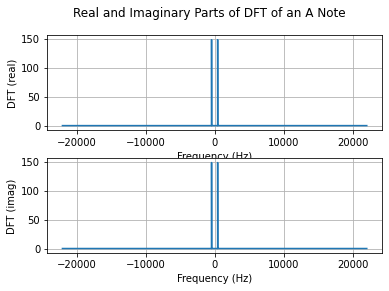

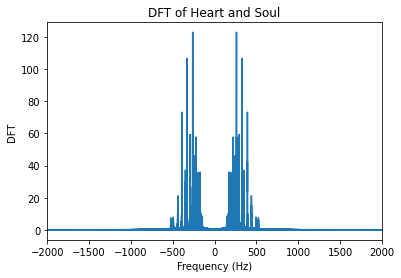

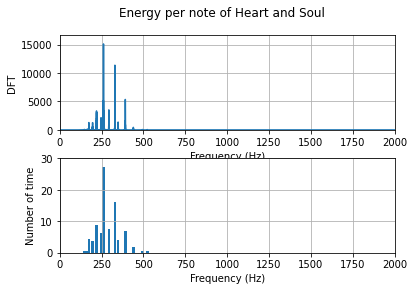

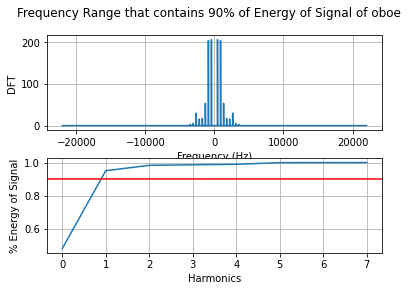

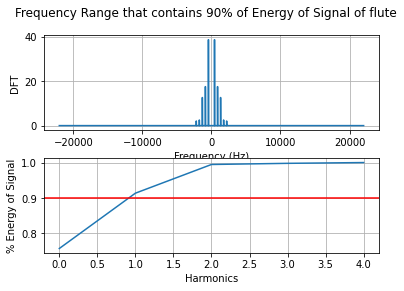

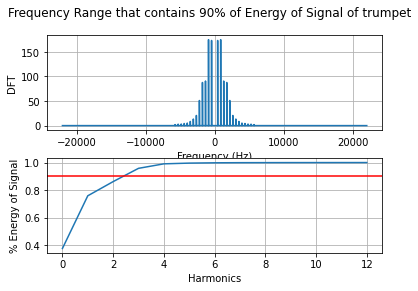

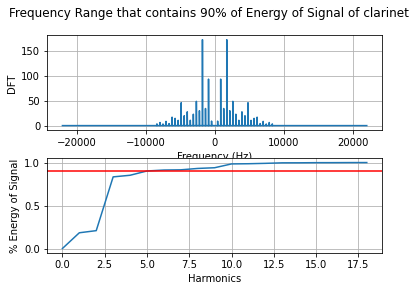

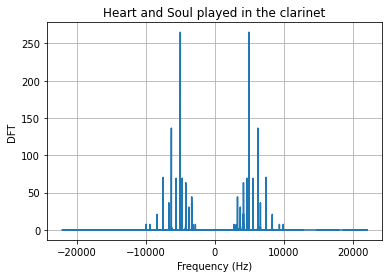

In [ ]:
if __name__ == '__main__':
  f_0 = 440
  T = 2 
  f_s = 44100 
  q_31(f_0, T, f_s)
  #notes 
  D3 = 30 
  E3 = 32 
  F3 = 33 
  G3 = 35 
  A3 = 37 
  B3 = 39 
  C4 = 40 
  D4 = 42 
  E4 = 44
  F4 = 45 
  G4 = 47 
  A4 = 49
  B4 = 51
  C5 = 52 

  #Song (Heart and Soul) 
  song_only_notes = [C4, C4, E4, E4, A3, A3, C4, C4, F3, F3, A3, A3, G3, G3, B3, 
                    B3, C4, C4, E4, E4, A3, A3, C4, C4, F3, F3, A3, A3, G3, G3, 
                    B3, B3, C4, C4, C4, C4, B3, A3, B3, C4, D4, E4, E4, E4, E4, 
                    D4, C4, D4, E4, F4, G4, C4, A4, G4, F4, E4, D4, C4, B3, A3, 
                    G3, F3, E3, D3, E3, F3, G3, A3, B3, C4, C4, E4, E4, A3, A3, 
                    C4, C4, F3, F3, A3, A3, G3, G3, B3, B3, C4, C4, C4, C4, B3, 
                    A3, B3, C4, D4, E4, E4, E4, E4, D4, C4, D4, E4, F4, G4, C4, 
                    A4, G4, F4, E4, D4, C4, C5, B4, A4, B4, A4, G4, F4, G4, F4, 
                    E4, D4, G4, C4] 
  #half note base
  rhythm = 1
  #eighth note
  e = rhythm * 0.5 
  #quarter note
  q = rhythm * 1.0 
  #quarter note + double triplet 
  qdt = rhythm * (1 + (2/3))
  #half note 
  h = rhythm * 2.0 
  #half note + double triplet 
  hdt = rhythm * (2 + (2/3)) 
  #triplet
  t = rhythm * (1/3) 
  #double triplet
  dt = rhythm * (2/3) 

  song_rhythm = [dt, t, dt, t, dt, t, dt, t, dt, t, dt, t, dt, t, dt, t, 
                dt, t, dt, t, dt, t, dt, t, dt, t, dt, t, dt, t, dt, t, 
                q, q, hdt, t, dt, t, dt, t, q, q, q, hdt, t, dt, t, dt, t, q, h, 
                hdt, t, dt, t, q, q, qdt, t, qdt, t, dt, t, dt, t, dt, t, dt, t,
                dt, t, dt, t, dt, t, dt, t, dt, t, dt, t, dt, t, dt, t, q, q, hdt, 
                t, dt, t, dt, t, q, q, q, 
                hdt, t, dt, t, dt, t, q, h, hdt, t, dt, t, q, q, q, dt, t, dt, 
                t, dt, t, dt, t, dt, t, q, q, h]  

  song,f_c, X_c=q_32(song_only_notes, song_rhythm, f_s)


  #q_33 

  notes = [D3, E3, F3, G3, A3, B3, C4, D4, E4, F4, G4, A4, B4, C5]
  notes_freq = [2 ** ((note - 49) / 12) * 440 for note in notes]

  notes_repetitions=[0 for i in range(len(notes))]
  for i,note in enumerate(song_only_notes):
      notes_repetitions[notes.index(int(note))]=notes_repetitions[notes.index(int(note))]+song_rhythm[i]

  q_33(song, f_c, X_c, notes_freq,notes_repetitions,notes)


  #q_34 
  
  oboe = [1.386, 1.370, 0.360, 0.116, 0.106, 0.201, 0.037, 0.019] 
  flute = [0.260, 0.118, 0.085, 0.017, 0.014]
  trumpet = [1.167, 1.178, 0.611, 0.591, 0.344, 0.139, 0.090, 0.057, 0.035, 
              0.029, 0.022, 0.020, 0.014] 
  clarinet = [0.061, 0.628, 0.231, 1.161, 0.201, 0.328, 0.154, 0.072, 0.186, 
              0.133, 0.309, 0.071, 0.098, 0.114, 0.027, 0.057, 0.022, 0.042, 
              0.023]

  f_0 = 440
  T = 2 
  f_s = 44100 

  q_34(f_0,T,f_s,[oboe,flute,trumpet,clarinet],
       ['oboe','flute','trumpet','clarinet'])
  
  q_35(song_only_notes, song_rhythm,  f_s, clarinet, 'clarinet')